# Boosting Machine Learning Algorithm

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\ganes\Desktop\ML-Ensembles-Methods-master (1)\ML-Ensembles-Methods-master\data\titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.dropna(inplace =True)

In [6]:
df['Pclass'].unique()

array([1, 3, 2], dtype=int64)

In [7]:
df['Pclass'].value_counts()

1    158
2     15
3     10
Name: Pclass, dtype: int64

In [8]:
df['Sex'].unique()

array(['female', 'male'], dtype=object)

In [9]:
df['Sex'].value_counts()

male      95
female    88
Name: Sex, dtype: int64

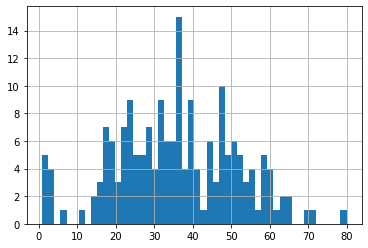

In [10]:
df['Age'].hist(bins = 50)

# Data Pre-processing 

In [11]:
X =df[['Pclass','Sex','Age']]

In [12]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()

In [13]:
X['Sex'] =lb.fit_transform(X['Sex'])

C:\Users\ganes\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
X.head()

,Pclass,Sex,Age
1,1,0,38.0
3,1,0,35.0
6,1,1,54.0
10,3,0,4.0
11,1,0,58.0


In [15]:
X.shape

(183, 3)

In [16]:
X.describe()

,Pclass,Sex,Age
count,183.000000,183.000000,183.000000
mean,1.191257,0.519126,35.674426
std,0.515187,0.501005,15.643866
min,1.000000,0.000000,0.920000
25%,1.000000,0.000000,24.000000
50%,1.000000,1.000000,36.000000
75%,1.000000,1.000000,47.500000
max,3.000000,1.000000,80.000000


In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 3 columns):
Pclass    183 non-null int64
Sex       183 non-null int32
Age       183 non-null float64
dtypes: float64(1), int32(1), int64(1)
memory usage: 5.0 KB


In [18]:
y = df['Survived']

In [19]:
y.value_counts()

1    123
0     60
Name: Survived, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split


In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3)

In [22]:
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [23]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))


# Applied AdaBoost Algorithm to the Dataset!

In [24]:
from sklearn.ensemble import AdaBoostClassifier

In [25]:
ada_clf =AdaBoostClassifier()

In [26]:
ada_clf.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [27]:
print_score(ada_clf,X_train,y_train,X_test,y_test,train=True)

Train Result:

accuracy score: 0.8906

Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.86      0.84        44
           1       0.93      0.90      0.92        84

    accuracy                           0.89       128
   macro avg       0.88      0.88      0.88       128
weighted avg       0.89      0.89      0.89       128


Confusion Matrix: 
 [[38  6]
 [ 8 76]]

Average Accuracy: 	 0.6964
Accuracy SD: 		 0.1348


In [28]:
print_score(ada_clf,X_train,y_train,X_test,y_test,train= False)

Test Result:

accuracy score: 0.7091

Classification Report: 
               precision    recall  f1-score   support

           0       0.50      0.69      0.58        16
           1       0.85      0.72      0.78        39

    accuracy                           0.71        55
   macro avg       0.67      0.70      0.68        55
weighted avg       0.75      0.71      0.72        55


Confusion Matrix: 
 [[11  5]
 [11 28]]



# AdaBoost with Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
ada_clf =AdaBoostClassifier(RandomForestClassifier())

In [31]:
ada_clf.fit(X_train,y_train)

C:\Users\ganes\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ganes\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ganes\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ganes\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ganes\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators='warn',
                     

In [32]:

print_score(ada_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 0.9531

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.91      0.93        44
           1       0.95      0.98      0.96        84

    accuracy                           0.95       128
   macro avg       0.95      0.94      0.95       128
weighted avg       0.95      0.95      0.95       128


Confusion Matrix: 
 [[40  4]
 [ 2 82]]



C:\Users\ganes\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ganes\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ganes\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ganes\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ganes\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

Average Accuracy: 	 0.7690
Accuracy SD: 		 0.0901


In [33]:
print_score(ada_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.7273

Classification Report: 
               precision    recall  f1-score   support

           0       0.52      0.69      0.59        16
           1       0.85      0.74      0.79        39

    accuracy                           0.73        55
   macro avg       0.69      0.72      0.69        55
weighted avg       0.76      0.73      0.74        55


Confusion Matrix: 
 [[11  5]
 [10 29]]



In [34]:
ada_clf = AdaBoostClassifier(base_estimator=RandomForestClassifier())

In [35]:
ada_clf.fit(X_train,y_train)

C:\Users\ganes\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ganes\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ganes\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ganes\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ganes\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators='warn',
                     

In [36]:

print_score(ada_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 0.9531

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.89      0.93        44
           1       0.94      0.99      0.97        84

    accuracy                           0.95       128
   macro avg       0.96      0.94      0.95       128
weighted avg       0.95      0.95      0.95       128


Confusion Matrix: 
 [[39  5]
 [ 1 83]]



C:\Users\ganes\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ganes\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ganes\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ganes\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ganes\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

Average Accuracy: 	 0.7690
Accuracy SD: 		 0.0901


C:\Users\ganes\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ganes\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [37]:
print_score(ada_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.7273

Classification Report: 
               precision    recall  f1-score   support

           0       0.52      0.69      0.59        16
           1       0.85      0.74      0.79        39

    accuracy                           0.73        55
   macro avg       0.69      0.72      0.69        55
weighted avg       0.76      0.73      0.74        55


Confusion Matrix: 
 [[11  5]
 [10 29]]

